In [1]:
import geopandas as gpd
import urllib
import os
import pylab as pl
import zipfile

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#download the data1
urllib.request.urlretrieve('https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip', 'ZIPCODE.gz')


('ZIPCODE.gz', <http.client.HTTPMessage at 0x7f964e555320>)

In [3]:
!mv ZIPCODE.gz $PUIDATA
!ls $PUIDATA

1p				      Parks.csv       solution6.csv
ACS_16_1YR_GCT2801.ST50_with_ann.csv  parkToPuma.csv  solution.csv
borough.csv			      PLUTO_for_WEB   time.csv
drinking_water_quaity.csv	      PUMA	      ZIP
GCT2801.csv			      PUMA.gz	      ZIPCODE.gz
linkNYClocations.csv		      rows.csv
nyc_pluto_18v1.zip		      solution3.csv


In [4]:
zipref = zipfile.ZipFile(os.getenv("PUIDATA") + "/ZIPCODE.gz", 'r')
zipref.extractall(os.getenv("PUIDATA") + '/ZIP')
zipref.close()

In [5]:
path = os.getenv("PUIDATA") + '/ZIP'
namelist = os.listdir(path)
print (namelist)

['ZIP_CODE_040114.shp', 'ZIP_CODE_040114.sbx', 'ZIP_CODE_040114.prj', 'ZIP_CODE_040114.dbf', 'ZIP_CODE_040114.sbn', 'ZIP_CODE_040114.shx', 'ZIP_CODE_040114.shp.xml']


In [6]:
def getshp(path):
    
    nl = os.listdir(path)
    for n in nl:
        if os.path.splitext(n)[-1] == '.shp':
            shp_nm = str(os.path.basename(n))
    return shp_nm
            
                    
path2 = os.getenv("PUIDATA") + '/ZIP'
getshp(path2)

'ZIP_CODE_040114.shp'

In [7]:
path_shp = os.getenv("PUIDATA") + '/ZIP/' + getshp(path)

In [8]:
zipshp = gpd.GeoDataFrame.from_file(path_shp)

In [9]:
zipshp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


Text(0.5,1,'NYC population by zip')

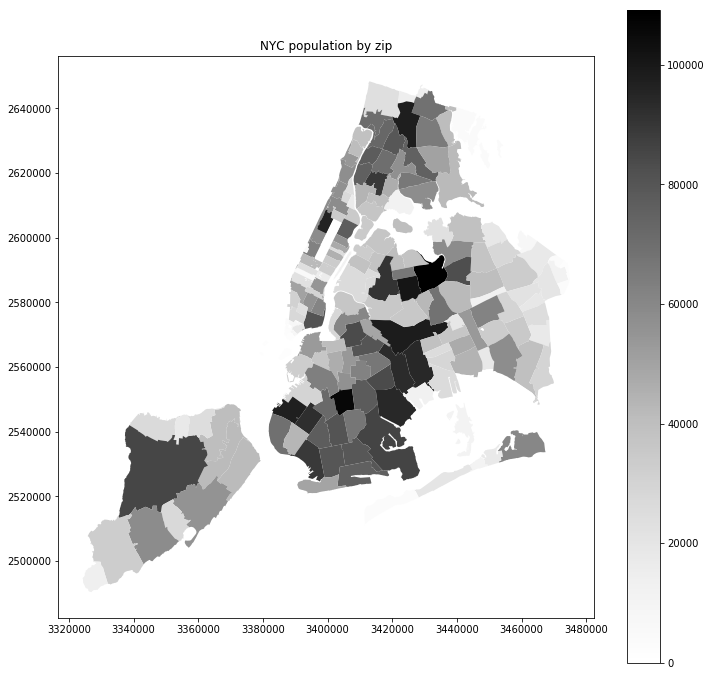

In [10]:
zipshp_mer = zipshp.to_crs(epsg = 3359)
m1 = zipshp_mer.plot(column = 'POPULATION', figsize = (12,12), cmap = 'Greys', legend = 'True')
m1.set_title("NYC population by zip")

Fig.1 This map shows the New York City population by zip. The darker the color is, the larger the population is.   
We can see that, the population size is largely influenced by the area of the land which could introduce some errors.   
Zipcode data is downloaded from NYC open data. 